# Unit 5 - Financial Planning

In [300]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from datetime import datetime       # Import datetime function
from datetime import timedelta      # Import timedelta function

# from MCForecastTools import MCSimulation
from NewForecastTools import MCSimulation   # Import the latest MC Simulation to overcome certain warning messages


%matplotlib inline

In [303]:
# Load .env enviroment variables
if not load_dotenv():
    print("Warning: environment variables were load loaded")  # print a warning if couldn't load the environment variables

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [304]:
# Set current amount of crypto assets
my_btc = 1.2   # Number of Bitcoins currently held
my_eth = 5.3   # Number of Etherium currently held

In [305]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [306]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_price = btc_data["data"]["1"]["quotes"]["CAD"]["price"]

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_price = eth_data["data"]["1027"]["quotes"]["CAD"]["price"]

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0,.2f}")     # Show the current BTC holding with value formatted with the thousands separator and 2 decimal places
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0,.2f}")     # Show the current ETH holding with value formatted with the thousands separator and 2 decimal places

# Acknowledgement https://docs.python.org/3/library/string.html#formatspec
# Please also refer to the end for an alternate solution.

The current value of your 1.2 BTC is $43,299.74
The current value of your 5.3 ETH is $11,465.43


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [307]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [308]:
# Set Alpaca API key and secret
alpaca_api_key = os.environ.get('ALPACA_API_KEY')        # Fetch the api key from the .env file
alpaca_secret_key = os.environ.get('ALPACA_SECRET_KEY')  # Fetch the secret key from the .env file

# Set the Alpaca API version
alpaca_api_version = "v2"

# Set the base URL to Alpaca Market's trading environment.
# Could have read this from the .env file but Bootcamp's AlpacaMarkets_Installation-Guide.md in the 05-APIs/Supplemental folder setup instructions don't mention setting this up.
# According to https://github.com/alpacahq/alpaca-trade-api-python/#alpaca-environment-variables the default is the live site, so to be safe even though we are just fetchting prices, we
# hard code the base url to the paper trading site.
alpaca_base_url = "https://paper-api.alpaca.markets"     # Set the base url to Alpaca's paper trading environment

# Create the Alpaca API object
alpaca_api = tradeapi.REST(key_id=alpaca_api_key, secret_key=alpaca_secret_key, base_url=alpaca_base_url, api_version=alpaca_api_version)

In [309]:
type(alpaca_api)

alpaca_trade_api.rest.REST

In [310]:
# Format current date as ISO format
# today = pd.Timestamp.now(tz="America/New_York").isoformat()       # Get current date (see note below)

##################################################################################################
# NOTE TO ASSESSOR:
# Alpaca returned the following error when trying to retrieve the prices for the current date:
#    "APIError: your subscription does not permit querying data from the past 15 minutes"
#
# Despite the error message the delayed time frame specified in the alpaca_api.get_bars request
# needs to be at least 12 hours, not 15 minutes.
# To overcome the above error and service restrictions, I opted for 1 day old data.
##################################################################################################

# Calculate yesterday's date as of midnight by getting the current datetime, subtracting 1 day,
# normalising to midnight and then formatting into iso format
yesterday = (pd.Timestamp.now( tz="America/New_York") + timedelta(days=-1)).normalize().isoformat()
  
# Set the tickers
tickers = ['AGG', 'SPY']
type_of_holding = ["bonds", "stocks"]   # Type of investment the corresponding tickers is

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# 4. Get the current closing prices for `SPY` and `AGG` using Alpaca's `get_bars()` function.
# Transform the function's response to a Pandas DataFrame and preview the data.

# Get current closing prices for SPY and AGG
df_portfolio = alpaca_api.get_bars(
    tickers,
    timeframe,
    start = yesterday,
    end = yesterday
).df

# Display sample data
df_portfolio

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2023-09-22 04:00:00+00:00,94.78,95.09,94.73,95.05,7294228,21212,95.013060,AGG
2023-09-22 04:00:00+00:00,432.45,434.10,429.99,430.42,100829684,637168,431.737394,SPY


# Note to Assessor 
The following instructions originally in the starter file seem to be inconsistent with steps 4 and 5 of the original README.md briefing.   
As such these have been ignored as there is no need to reorganise the data frame in order to fetch the current prices.

In [311]:
# Reorganize the DataFrame
# Separate ticker data
#### SEE NOTE ABOVE  ####
# Concatenate the ticker DataFrames

In [312]:
# 5. Pick the `SPY` and `AGG` close prices from the Alpaca's `get_bars()` DataFrame response and store them as Python variables.
# Pick AGG and SPY close prices
spy_close_price = float(df_portfolio[df_portfolio["symbol"] == "SPY"]["close"])
agg_close_price = float(df_portfolio[df_portfolio["symbol"] == "AGG"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $95.05
Current SPY closing price: $430.42


In [313]:
# 6. Compute the value in dollars of the current amount of shares and print the results.
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0,.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0,.2f}")

The current value of your 50 SPY shares is $21,521.00
The current value of your 200 AGG shares is $19,010.00


### Savings Health Analysis

In [314]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_crypto_value = my_spy_value + my_agg_value
total_shares_value = my_btc_value + my_eth_value

# Create savings DataFrame
df_savings = pd.DataFrame([total_crypto_value, total_shares_value], index=["crypto", "shares"], columns=["amount"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,40531.00000
shares,54765.17382


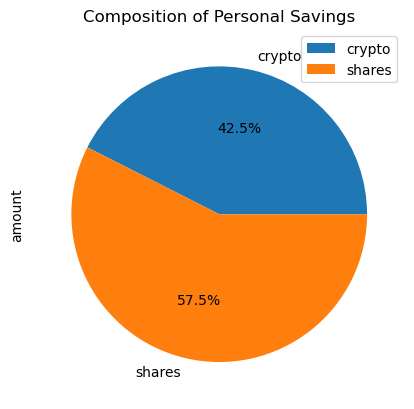

In [315]:
# Plot savings pie chart
savings_figure  = df_savings.plot.pie( y="amount", autopct = "%1.1f%%" , title = "Composition of Personal Savings" )


In [316]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings_amount = total_crypto_value + total_shares_value

# Validate saving health
if total_savings_amount > emergency_fund:                                # Check if total savings exceeds emergency fund, if so congratulate for exceeding
    display( "Congratulations on exceeding your financial goal!" )
    
if total_savings_amount == emergency_fund:                               # Check if total savings equals emergency fund, if so congratulate for reaching
    display( "Congratulations on reaching your financial goal!" )

if  total_savings_amount < emergency_fund:                               # Check if total savings are less than emergency fund, if so inform how much left to go
    amount_left = emergency_fund - total_savings_amount
    display( f"You need ${amount_left:0,.2f} to reach your financial goal." )
    
# Alternatively could have used if, elif, else

'Congratulations on exceeding your financial goal!'

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [317]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [318]:
# Get 5 years' worth of historical data for SPY and AGG
df_5y_historical_data = alpaca_api.get_bars( tickers, timeframe, start = start_date, end = end_date ).df

######### TECHNICALLY THIS CODE IS NO LONGER REQUIRED WITH THE NEW MONTE CARLO LIBRARY - START ##############
# Reorganize the DataFrame
# Separate ticker data
AGG = df_5y_historical_data[df_5y_historical_data["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = df_5y_historical_data[df_5y_historical_data["symbol"]=="SPY"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
df_5y_portfolio = pd.concat([AGG, SPY],axis=1, keys=["AGG","SPY"])

# Display sample data
df_5y_portfolio.head()

######### TECHNICALLY THIS CODE IS NO LONGER REQUIRED WITH THE NEW MONTE CARLO LIBRARY - END ##############

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.92  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.52  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  204.99  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.56  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.08  205.77  203.88   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2016-05-02 04:00:00+00:00  207.9700   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.1592  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  205.0100   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.9700   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.7200   89131004      340335  204.937074

In [319]:
df_5y_historical_data.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2016-05-02 04:00:00+00:00,110.74,110.7400,110.5200,110.605,3553939,15119,110.627199,AGG
2016-05-03 04:00:00+00:00,110.89,110.9450,110.7500,110.810,3044940,15662,110.865995,AGG
2016-05-04 04:00:00+00:00,110.91,110.9315,110.7595,110.860,2920608,13982,110.879063,AGG
2016-05-05 04:00:00+00:00,110.92,111.1600,110.8010,111.140,3008142,15707,111.028363,AGG
2016-05-06 04:00:00+00:00,111.12,111.1200,110.9700,110.970,2718710,12697,111.031967,AGG


Note to assessor: the script was refactored to reduce duplication. The following function was introduced as a result.

In [322]:
# Run all of the Monte Carlo simulation analysis. 
#   Inputs:
#      forecast_years (number of years to forecast)
#      weightings (list of weightings of the portfolio)
#      initial_investment (initial investment amount )
#
def monte_carlo_simulation_analysis( forecast_years, weightings, initial_investment ):

    # Run the Monte Carlo simulation
    MC_sim = MCSimulation(
        portfolio_data = df_5y_historical_data,
        weights = weightings,
        num_simulation = 500,
        num_trading_days = 252 * forecast_years
    )
    
    # Printing the simulation input data
    print("Daily returns")
    print(MC_sim.daily_returns.head(), "\n")
    
    # Running a Monte Carlo simulation to forecast cumulative returns
    print("Simulation cumulative returns")
    print(MC_sim.calc_cumulative_return(), "\n")
    
    # Plot simulation outcomes
    line_plot = MC_sim.plot_simulation()
    print()

    # Plot probability distribution and confidence intervals
    dist_plot = MC_sim.plot_distribution()
    print()
    
    # Fetch summary statistics from the Monte Carlo simulation results
    cr_table = MC_sim.summarize_cumulative_return()

    # Print summary statistics
    print("Summary statistics")
    print(cr_table)
    print()
    
    # Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of the initial investment
    ci_lower = round(cr_table["95% CI Lower"]*initial_investment,2)
    ci_upper = round(cr_table["95% CI Upper"]*initial_investment,2)

    # Print a summary of input parameters and the confidence indications
    print ("Confidence Interval Analysis")
    print("With a portfolio consisting of ", end="" )           # Show the portfolio composition by asset type
    for i in range( 0, len(weightings) ):
        if i == len(weightings) - 1:                            # joining the last two asset types with an "and"
            print(" and ", end="" )
        elif i > 0:
            print(", ", end="" )                                # separating other asset types with a comma
        print(f"{weightings[i]*100:0}% {type_of_holding[i]}", end="" )

    # Print results
    print(f", there is a 95% chance that an initial investment of ${initial_investment:0,.2f} in the portfolio"
          f" over the next {forecast_years} years will end within in the range of"
          f" ${ci_lower:0,.2f} and ${ci_upper:0,.2f}")    

### Retirement Analysis

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

Daily returns
symbol                          AGG       SPY
timestamp                                    
2016-05-03 04:00:00+00:00  0.001853 -0.008707
2016-05-04 04:00:00+00:00  0.000451 -0.005574
2016-05-05 04:00:00+00:00  0.002526 -0.000195
2016-05-06 04:00:00+00:00 -0.001530  0.003659
2016-05-09 04:00:00+00:00  0.000631  0.000822 

Simulation cumulative returns
           0         1         2         3         4         5         6    \
0     0.988020  0.999370  1.003638  1.002472  0.999885  0.999461  1.011089   
1     0.989647  1.004125  0.996184  0.997790  1.007235  1.002811  1.002545   
2     0.994772  1.004072  0.989678  0.994590  1.007529  1.001135  1.012296   
3     0.988392  0.998797  0.992198  0.996671  1.005254  1.010034  1.020403   
4     0.984418  0.995078  0.993582  0.997489  1.000171  1.017023  1.023680   
...        ...       ...       ...       ...       ...       ...       ...   
7554  0.500402  0.396035  0.393134  0.451753  0.284992  0.513301  0.295185   
7555  0.

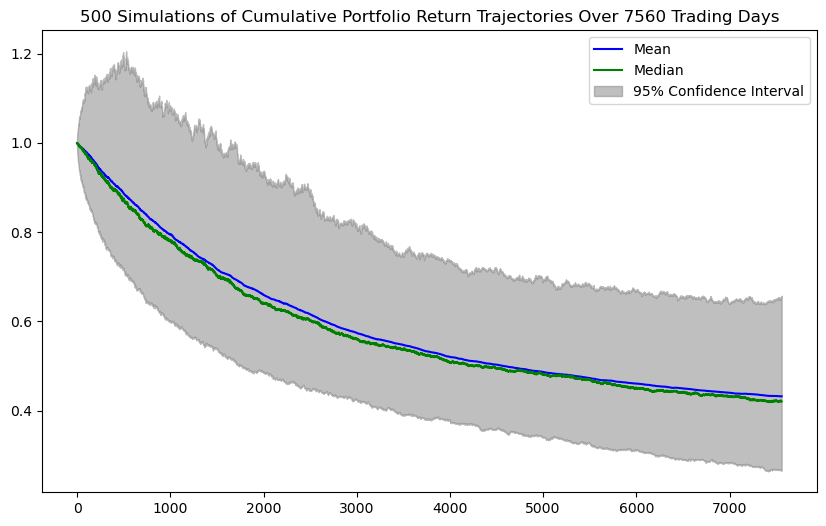

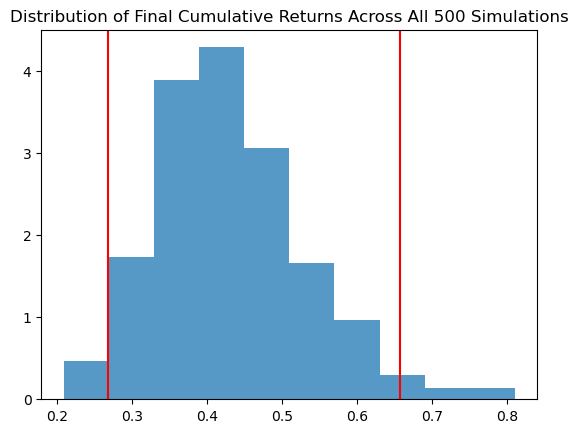


Summary statistics
count           500.000000
mean              0.432309
std               0.098687
min               0.209203
25%               0.366508
50%               0.420784
75%               0.483577
max               0.810792
95% CI Lower      0.267949
95% CI Upper      0.657472
Name: 7558, dtype: float64

Confidence Interval Analysis
With a portfolio consisting of 40.0% bonds and 60.0% stocks, there is a 95% chance that an initial investment of $20,000.00 in the portfolio over the next 30 years will end within in the range of $5,358.97 and $13,149.44


In [296]:
monte_carlo_simulation_analysis(30, [0.40, 0.60], 20000) # Run simulation for 30 years, 40/60% mix and 20k initial investment

In [255]:
def show_predictions( initial_investment ):  # Function to show the predictions with an input of the initial amount, and reduce duplicate script.

    # Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
    ci_lower = round(cr_table["95% CI Lower"]*initial_investment,2)
    ci_upper = round(cr_table["95% CI Upper"]*initial_investment,2)

    print("With a portfolio consisting of ", end="" )           # Show the portfolio composition by asset type
    for i in range( 0, len(weightings) ):
        if i == len(weightings) - 1:                            # joining the last two asset types with an "and"
            print(" and ", end="" )
        elif i > 0:
            print(", ", end="" )                                # separating other asset types with a comma
        print(f"{weightings[i]*100:0}% {type_of_holding[i]}", end="" )

    # Print results
    print(f", there is a 95% chance that an initial investment of ${initial_investment:0,.2f} in the portfolio"
          f" over the next {forecast_years} years will end within in the range of"
          f" ${ci_lower:0,.2f} and ${ci_upper:0,.2f}")

In [256]:
# Set initial investment
initial_investment = 20000

# Show the prediction based on the initial investment
show_predictions ( initial_investment )

With a portfolio consisting of 40.0% bonds and 60.0% stocks, there is a 95% chance that an initial investment of $20,000.00 in the portfolio over the next 30 years will end within in the range of $5,348.21 and $13,115.81


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

Daily returns
symbol                          AGG       SPY
timestamp                                    
2016-05-03 04:00:00+00:00  0.001853 -0.008707
2016-05-04 04:00:00+00:00  0.000451 -0.005574
2016-05-05 04:00:00+00:00  0.002526 -0.000195
2016-05-06 04:00:00+00:00 -0.001530  0.003659
2016-05-09 04:00:00+00:00  0.000631  0.000822 

Simulation cumulative returns
           0         1         2         3         4         5         6    \
0     0.998954  1.008256  0.992354  0.998007  0.993589  0.996850  0.994174   
1     0.994376  1.002167  0.980229  0.994389  0.991639  0.992113  0.992291   
2     0.997447  1.000692  0.989097  0.992720  0.985058  0.987168  0.987807   
3     1.001378  0.997460  0.985357  0.999177  0.980464  0.986130  0.986292   
4     1.014406  0.988197  0.985241  0.990685  0.977760  0.995054  0.996291   
...        ...       ...       ...       ...       ...       ...       ...   
7554  0.403485  0.320784  0.371775  0.441425  0.372501  0.448122  0.408398   
7555  0.

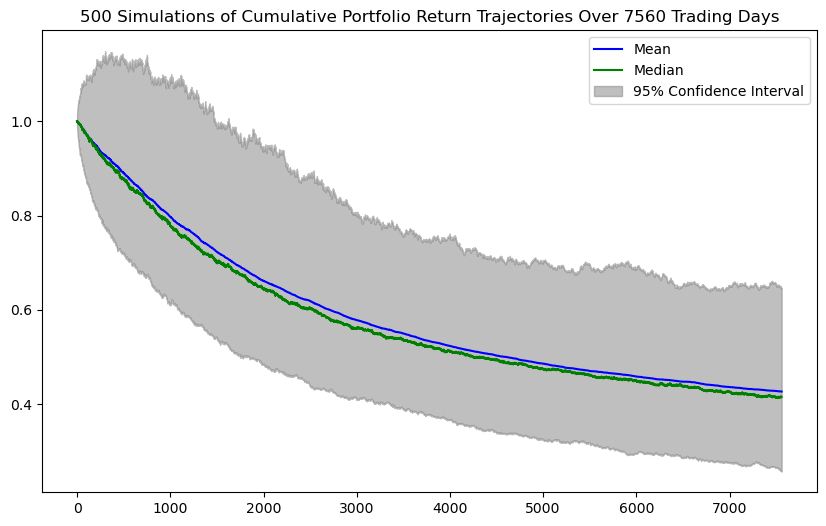

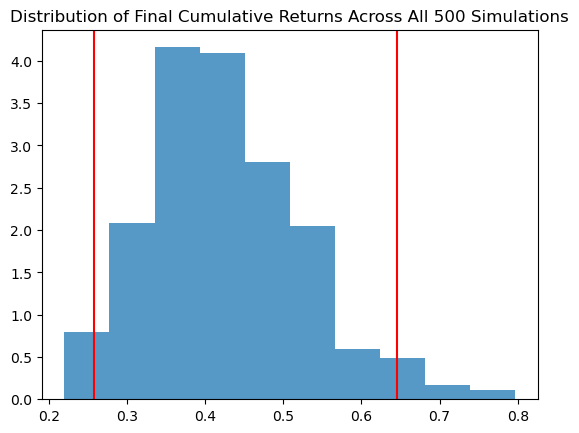


Summary statistics
count           500.000000
mean              0.426649
std               0.098995
min               0.219982
25%               0.358124
50%               0.415363
75%               0.486661
max               0.796825
95% CI Lower      0.257689
95% CI Upper      0.646049
Name: 7558, dtype: float64

Confidence Interval Analysis
With a portfolio consisting of 40.0% bonds and 60.0% stocks, there is a 95% chance that an initial investment of $30,000.00 in the portfolio over the next 30 years will end within in the range of $7,730.67 and $19,381.48


In [297]:
monte_carlo_simulation_analysis(30, [0.40, 0.60], 20000*1.5) # Run simulation for 30 years, 40/60% mix and 30k initial investment

## Optional Challenge - Early Retirement


### Five Years Retirement Option

Daily returns
symbol                          AGG       SPY
timestamp                                    
2016-05-03 04:00:00+00:00  0.001853 -0.008707
2016-05-04 04:00:00+00:00  0.000451 -0.005574
2016-05-05 04:00:00+00:00  0.002526 -0.000195
2016-05-06 04:00:00+00:00 -0.001530  0.003659
2016-05-09 04:00:00+00:00  0.000631  0.000822 

Simulation cumulative returns
           0         1         2         3         4         5         6    \
0     1.000125  0.997981  0.998554  1.005096  0.993499  0.992562  0.993851   
1     1.000601  0.998718  0.997246  1.008946  1.001404  0.994909  0.997833   
2     0.993222  0.994818  0.991148  1.002387  1.001284  0.993801  1.000255   
3     0.988131  1.001789  0.996997  1.010782  0.983733  0.984933  1.005911   
4     0.991312  1.012884  0.989353  1.005850  0.992342  0.994622  1.000363   
...        ...       ...       ...       ...       ...       ...       ...   
1254  1.005816  0.796019  0.666253  0.741588  0.899096  0.655442  0.847159   
1255  1.

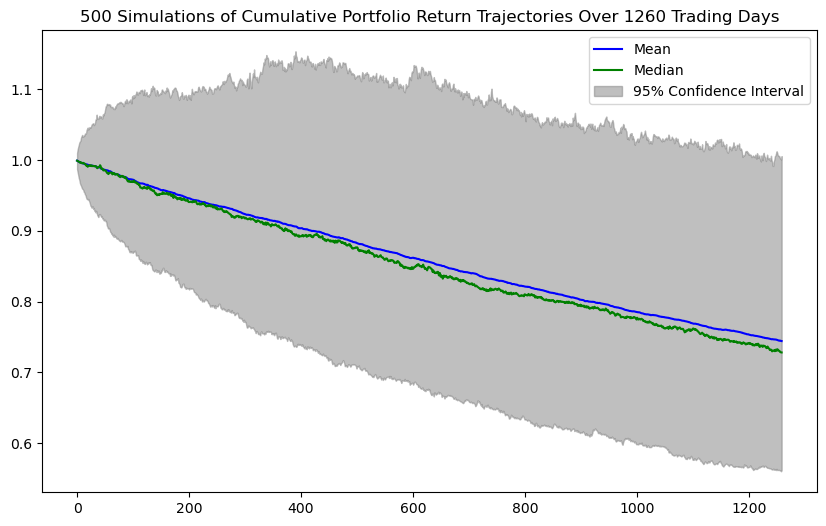

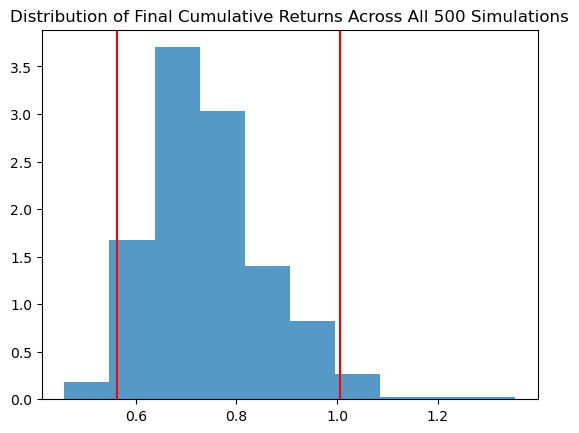


Summary statistics
count           500.000000
mean              0.744165
std               0.116070
min               0.457787
25%               0.665431
50%               0.728034
75%               0.806304
max               1.354601
95% CI Lower      0.561515
95% CI Upper      1.005543
Name: 1258, dtype: float64

Confidence Interval Analysis
With a portfolio consisting of 20.0% bonds and 80.0% stocks, there is a 95% chance that an initial investment of $20,000.00 in the portfolio over the next 5 years will end within in the range of $11,230.30 and $20,110.86


In [298]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
monte_carlo_simulation_analysis(5, [0.20, 0.80], 20000) # Run simulation for 5 years, 20/80% mix and 20k initial investment

### Ten Years Retirement Option

Daily returns
symbol                          AGG       SPY
timestamp                                    
2016-05-03 04:00:00+00:00  0.001853 -0.008707
2016-05-04 04:00:00+00:00  0.000451 -0.005574
2016-05-05 04:00:00+00:00  0.002526 -0.000195
2016-05-06 04:00:00+00:00 -0.001530  0.003659
2016-05-09 04:00:00+00:00  0.000631  0.000822 

Simulation cumulative returns
           0         1         2         3         4         5         6    \
0     1.000597  0.998676  0.996724  0.999679  1.000289  1.003735  0.996980   
1     1.005325  0.995371  0.995540  0.995433  1.004447  1.000057  0.990372   
2     1.005461  0.992518  0.993677  1.004211  1.019280  0.995135  0.979360   
3     1.010602  0.997358  0.986024  0.995195  1.023570  0.990427  0.987789   
4     1.009520  0.993584  0.998306  0.989496  1.016542  0.996532  0.983442   
...        ...       ...       ...       ...       ...       ...       ...   
2514  0.857551  0.536634  0.573342  0.473429  0.523482  0.625399  0.651588   
2515  0.

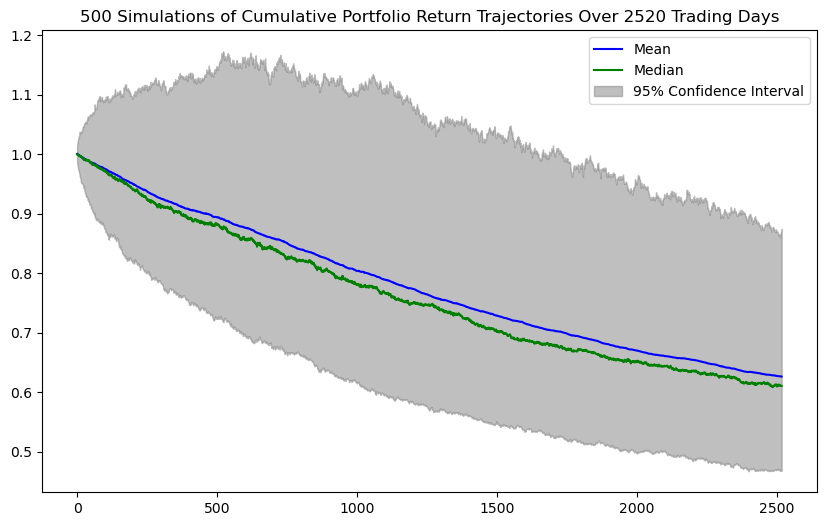

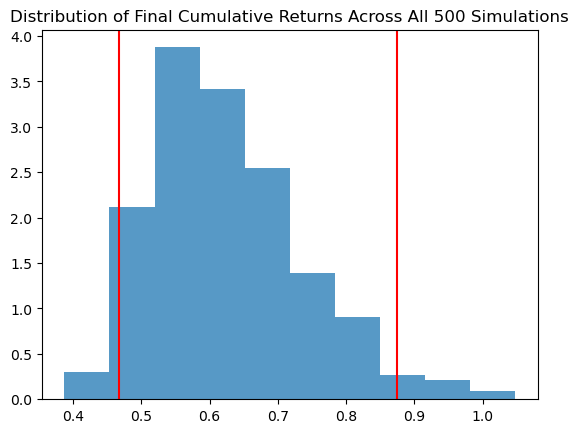


Summary statistics
count           500.000000
mean              0.626211
std               0.109686
min               0.387330
25%               0.544618
50%               0.610459
75%               0.689879
max               1.047951
95% CI Lower      0.467757
95% CI Upper      0.874052
Name: 2518, dtype: float64

Confidence Interval Analysis
With a portfolio consisting of 20.0% bonds and 80.0% stocks, there is a 95% chance that an initial investment of $20,000.00 in the portfolio over the next 10 years will end within in the range of $9,355.13 and $17,481.03


In [299]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
monte_carlo_simulation_analysis(10, [0.20, 0.80], 20000) # Run simulation for 10 years, 20/80% mix and 20k initial investment

---

# Alternate solution using a dictionary for "Collect Crypto Prices Using the requests Library"

In [ ]:
# Alternate solution using a dictionary

# Define a dictionary for my portfolio
# the dictionary's schema is:
#    "integer": {              Unique index number E.g. 0
#        "name": "string",     Coin long name E.g. Bitcoin (as per alternative.me naming convention https://alternative.me/crypto/api/)
#        "symbol": "string",   Coin ticker symbol E.g. BTC
#        "coin_id": "integer", Coin's identifier on alternative.me. Eg. 1027 for etherium
#        "holding": "float"      Quantity of coin currently held in my portfolio
#    },

my_portfolio = {
    "0": {
        "name": "Bitcoin",
        "symbol": "BTC",
        "coin_id": 1,
        "holding": "1.2"
    },
    "1": {
        "name": "Ethereum",
        "symbol": "ETH",
        "coin_id": 1027,
        "holding": "5.3"
    }
}

preferred_currency_code = "CAD"   # Set the preferred currency code to fetch from alternative.me

In [ ]:
my_portfolio

In [ ]:
total_portfolio_value = 0 # initialise the total portfolio value

for coin in my_portfolio:
    # Get the coin details from my portfolio dictionary
    coin_name = my_portfolio[coin]["name"]
    coin_symbol = my_portfolio[coin]["symbol"]
    coin_id = str(my_portfolio[coin]["coin_id"])
    coin_holding = float(my_portfolio[coin]["holding"])

    url = f"https://api.alternative.me/v2/ticker/{coin_name}/?convert={preferred_currency_code}"  # build the url with the coin name and desired currency code
    coin_data = requests.get(url).json()  # fetch the pricing data
    
    coin_price = float(coin_data["data"][coin_id]["quotes"][preferred_currency_code]["price"])   # Convert the coin price into a float
    coin_value = coin_price * coin_holding     # Muliply the current coin price by our holding of the coin to get the value
    total_portfolio_value += coin_value        # Add the value of the current coin to the total portfolio value

    time_stamp = coin_data["metadata"]["timestamp"]    # Additional information - grab the timestamp from the feed data which is in Unix epoch in seconds (eg 1544129220 )  
    date_time = datetime.fromtimestamp(time_stamp)     # ...and convert it to a human readable format
    
    # Show the date and time when the coin price was applicable, the coin name, symbol and holding value based on how many coins we have in the portfolio.
    # ...formatting the value with the thousands separator and 2 decimal places  
    print(f"The current value (as at {date_time}) of your {coin_name} ({coin_symbol}) in {preferred_currency_code} is ${coin_value:0,.2f}")

print(f"The current total value of your portfolio in {preferred_currency_code} is ${total_portfolio_value:0,.2f}")    